In [60]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
import matplotlib.animation as animation


import warnings
warnings.filterwarnings("ignore")

In [61]:
def single_site_number_operator(N, M, site_index, synth_level, states):
    dim = M**N
    number_operator_matrix = np.zeros((dim, dim), dtype=np.complex128)
    
    for k in range(dim):
        if states[k][site_index] == synth_level:
            number_operator_matrix[k,k] = 1
             
    return number_operator_matrix

In [62]:
N = 3
M = 5
V = 0
J = 1
mu = 0

states, _ = enumerate_states(N, M)
hamiltonian = construct_hamiltonian(N, M, V, mu, J)
eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)

state = eigenvectors[0]

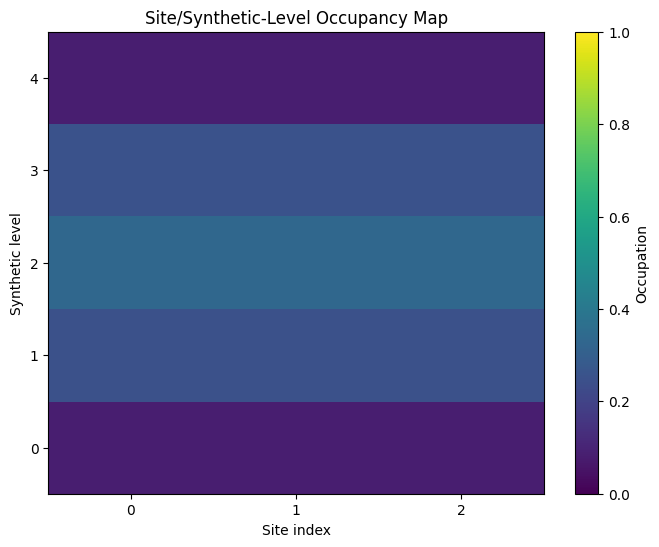

In [63]:
N_locs = range(N)
M_locs = range(M)
occupancy_grid = np.zeros((M, N))

for i, N_loc in enumerate(N_locs):
    for j, M_loc in enumerate(M_locs):
        op = single_site_number_operator(N, M, site_index=N_loc, synth_level=M_loc, states=states)
        occupancy = np.real(state.conj().T @ op @ state)
        occupancy_grid[j, i] = occupancy

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(occupancy_grid, origin='lower', cmap='viridis', aspect='auto', vmin = 0, vmax = 1)
plt.colorbar(label='Occupation')
plt.xlabel('Site index')
plt.ylabel('Synthetic level')
plt.title('Site/Synthetic-Level Occupancy Map')
plt.xticks(ticks=np.arange(N), labels=N_locs)
plt.yticks(ticks=np.arange(M), labels=M_locs)
plt.show()


In [ ]:
N = 3
M = 5
V = 0
J = 1
mu = 0

states, _ = enumerate_states(N, M)
hamiltonian = construct_hamiltonian(N, M, V, mu, J)
eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)

initial_state = np.zeros(M**N)
initial_state[0] = 1

times = np.linspace(0,10,100)
hamiltonians = [hamiltonian for time in times]

results = simulate_hamiltonian_time_evolution(hamiltonians, times, initial_state)
_, time_evolved_wavefunctions, _, _, _, _ = results

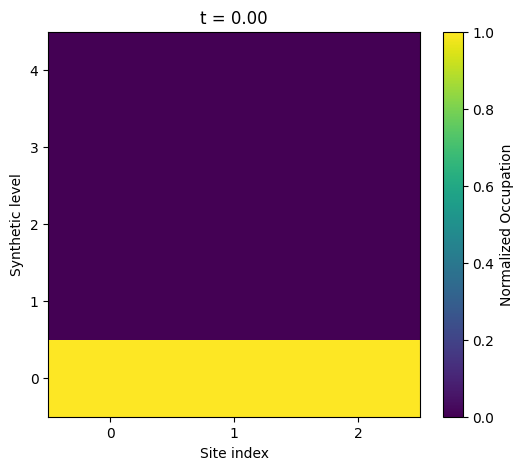

In [ ]:
# Precompute occupancy grids
occupancy_grids = []
for state in time_evolved_wavefunctions:
    grid = np.zeros((M, N))
    for i in range(N):
        for j in range(M):
            op = single_site_number_operator(N, M, site_index=i, synth_level=j, states=states)
            occupancy = np.real(state.conj().T @ op @ state)
            grid[j, i] = occupancy
    occupancy_grids.append(grid)

# Normalize globally for consistent color scale
max_val = np.max(occupancy_grids)
occupancy_grids = [grid / max_val for grid in occupancy_grids]

# Create animation
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(occupancy_grids[0], origin='lower', cmap='viridis', aspect='auto', vmin=0, vmax=1)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Normalized Occupation')

ax.set_xlabel("Site index")
ax.set_ylabel("Synthetic level")
ax.set_title(f"t = {times[0]:.2f}")
ax.set_xticks(np.arange(N))
ax.set_yticks(np.arange(M))

def update(frame):
    im.set_array(occupancy_grids[frame])
    ax.set_title(f"t = {times[frame]:.2f}")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=len(times), blit=True, interval=100)

plt.show()
from matplotlib.animation import PillowWriter

writer = PillowWriter(fps=10)
ani.save("occupancy_evolution.gif", writer=writer)

